In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("mushroom.csv")

In [5]:
data["stalk-root"] =data["stalk-root"].replace('?',np.nan) 

In [6]:
data = data.drop(['veil-type'],axis=1)

In [7]:
from autoimpute.imputations import SingleImputer

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.


Could not locate executable gfortran
Could not locate executable f95
Could not locate executable g95
Could not locate executable efort
Could not locate executable efc
Could not locate executable flang
don't know how to compile Fortran code on platform 'nt'


WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
impute = SingleImputer(strategy='categorical')

In [9]:
impute.fit(data)

SingleImputer(strategy='categorical')

In [10]:
imputed_data =impute.transform(data)

In [11]:
imputed_data.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [12]:
for column in imputed_data.columns:
    print(column,imputed_data[column].nunique())

cap-shape 6
cap-surface 4
cap-color 10
bruises%3F 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7
class 2


In [13]:
imputed_data["class"] = imputed_data["class"].map({"'p'" : 0, "'e'" : 1})

In [14]:
for column in imputed_data.drop(['class'],axis=1).columns:
    imputed_data = pd.get_dummies(imputed_data, columns=[column], drop_first=True)
    

In [15]:
imputed_data

,class,cap-shape_'c',cap-shape_'f',cap-shape_'k',cap-shape_'s',cap-shape_'x',cap-surface_'g',cap-surface_'s',cap-surface_'y',cap-color_'c',...,population_'n',population_'s',population_'v',population_'y',habitat_'g',habitat_'l',habitat_'m',habitat_'p',habitat_'u',habitat_'w'
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [17]:
import seaborn as sns

C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

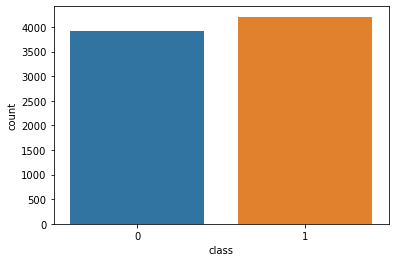

In [18]:
sns.countplot(imputed_data['class'])

In [19]:
x=imputed_data.drop(['class'],axis=1)
y=imputed_data['class']

In [36]:
x = x.values.astype('float32')
y = y.values.astype('float32')


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=355 )
train_x,valid_x,train_y,valid_y=train_test_split(x,y,test_size=0.2,random_state=355 )

In [39]:
import tensorflow as tf

In [40]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(20,activation=tf.nn.relu),
                        tf.keras.layers.Dense(2,activation='softmax')])


In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [42]:
history = model.fit(train_x,train_y,epochs=20, validation_data=(valid_x, valid_y))

Epoch 1/20
204/204 [==============================] - 1s 3ms/step - loss: 0.2600 - acc: 0.9106 - val_loss: 0.0657 - val_acc: 0.9846
Epoch 2/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0417 - acc: 0.9925 - val_loss: 0.0240 - val_acc: 0.9969
Epoch 3/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0195 - acc: 0.9980 - val_loss: 0.0123 - val_acc: 0.9994
Epoch 4/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0111 - acc: 0.9989 - val_loss: 0.0078 - val_acc: 1.0000
Epoch 5/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0069 - acc: 0.9995 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 6/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.9997 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 7/20
204/204 [==============================] - 0s 2ms/step - loss: 0.0031 - acc: 0.9998 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 8/20
204/204 [==============================] - 0s 2ms/step - loss: 0.

In [43]:
test_x

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], dtype=float32)

In [44]:
prediction_features=model.predict(test_x)
performance=model.evaluate(test_x,test_y)
print(performance)

51/51 [==============================] - 0s 980us/step - loss: 2.6059e-04 - acc: 1.0000
[0.0002605949412100017, 1.0]


In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

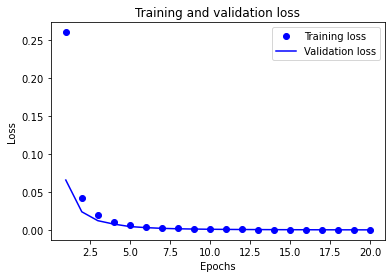

In [46]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()